<a href="https://colab.research.google.com/github/Meitiann/INF2008-ML-Labs/blob/main/Naive_Bayes_Updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [473]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from google.colab import files

In [474]:
# Load the dataset
df = pd.read_csv('preprocessed_merged_data.csv')

In [475]:
# Display first few rows
print(df.head())

   Body ID                                           Headline  \
0        0  Small Meteorite Strikes in Nicaragua's Capital...   
1        8  What was fake on the Internet this week: Obama...   
2        9  Meteorite makes big crater in Nicaragua, gover...   
3        9  Small Meteorite Strikes in Nicaragua's Capital...   
4       13  A soldier has been shot at Canada’s war memori...   

                                         articleBody  Stance  
0  A small meteorite crashed into a wooded area i...       0  
1  There is so much fake stuff on the Internet in...       0  
2  (CNN) -- A meteorite crashed down in Managua, ...       0  
3  (CNN) -- A meteorite crashed down in Managua, ...       0  
4  A SOLDIER has been shot at Canada’s National W...       0  


In [476]:
# Check column names
print(df.columns)

Index(['Body ID', 'Headline', 'articleBody', 'Stance'], dtype='object')


In [477]:
# Update column names based on dataset
text_column = df["Headline"] + " " + df["articleBody"]  # Adjust based on correct news content column
label_column = "Stance"  # Check what values Stance contains

In [478]:
# Check label values
print(df[label_column].unique())

[0 1]


In [479]:
# Convert labels into binary (Adjust mapping based on real dataset values)
df[label_column] = df[label_column].map({0: 0, 1: 1, 2: 1, 3: 1})  # Adjust based on real/fake values

In [480]:
# Drop missing values
df.dropna(subset=["Headline", "articleBody", label_column], inplace=True)

In [481]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    text_column, df[label_column], test_size=0.2, random_state=42
)


In [482]:
# Convert text to numerical representation (TF-IDF)
vectorizer = TfidfVectorizer(stop_words="english", max_features=15000, min_df=2, max_df=0.9)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [483]:
# Train Naïve Bayes model
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)


MultinomialNB()

In [484]:
# Predictions
y_pred = model.predict(X_test_tfidf)

In [485]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8279


In [486]:
# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.95      0.90       741
           1       0.50      0.22      0.31       154

    accuracy                           0.83       895
   macro avg       0.68      0.59      0.60       895
weighted avg       0.79      0.83      0.80       895



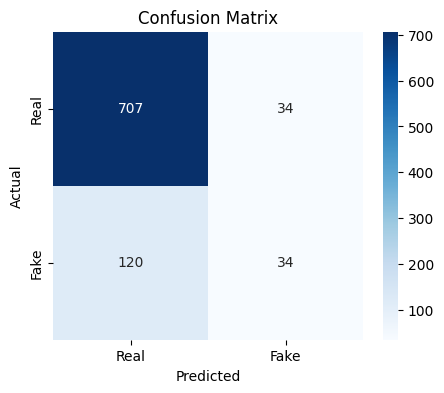

In [487]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Real", "Fake"], yticklabels=["Real", "Fake"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Accuracy decreased after merging Headline + Article body together
(This approach adds more context for classification but also increases noise. If the body text contains redundant or less relevant info, the classifier might struggle to distinguish between real and fake news effectively)

Accuracy increased after changing TF-IDF max_features to 10000 instead of 5000

Accuracy decreased after adding ngram_range = (1,2)
(Using both unigrams and bigrams increases feature complexity. While bigrams can capture contextual phrases, they can also introduce sparsity, leading to overfitting or reduced generalizability)

0.8056 accuracy with ngram_range = (1,2). will decrease if (1,3) or (2,3)

0.8089 accuracy improved with max_Features 15000 instead of 10000

current 0.8279 if remove ngram_range = (1,2)

Looking at the confusion matrix, there is a class imbalance where there is more bias towards real news.

Since Naive Bayes works based on word probabilities, if fake news uses more diverse or unpredictable words, the model may struggle.